# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv("../Starter_Code_4/SAMPLE.env")

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19376537,
            "id": 1,
            "last_updated": 1684376973,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 528941453288,
                    "percent_change_1h": -0.334640657042366,
                    "percent_change_24h": 0.560117676054771,
                    "percent_change_7d": -1.03618020469524,
                    "percentage_change_1h": -0.334640657042366,
                    "percentage_change_24h": 0.560117676054771,
                    "percentage_change_7d": -1.03618020469524,
                    "price": 27304.0,
                    "volume_24h": 11111688874
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19376537,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = btc_call = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 120279330,
            "id": 1027,
            "last_updated": 1684376976,
            "max_supply": 120279330,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 218828998202,
                    "percent_change_1h": -0.221104589765413,
                    "percent_change_24h": -0.488833513020984,
                    "percent_change_7d": -0.874294975431106,
                    "percentage_change_1h": -0.221104589765413,
                    "percentage_change_24h": -0.488833513020984,
                    "percentage_change_7d": -0.874294975431106,
                    "price": 1820.61,
                    "volume_24h": 6624313862
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120279330,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "n

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response ['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
btc_price


27304.0

In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response ['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
eth_price


1820.61

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_price*btc_coins

# Print current value of your holding in BTC
btc_value


32764.8

In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
eth_value


9649.232999999998

In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
total_crypto_wallet


42414.032999999996

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")



# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp('2023-05-10', tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-05-10", tz="America/New_York").isoformat()



#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
closing_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = closing_df[closing_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = closing_df[closing_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
closing_df = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Review the first 5 rows of the Alpaca DataFrame
closing_df.head()


AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2023-05-10 04:00:00+00:00  99.43  99.68  99.39  99.65  4803044       18737   

                                         SPY                           \
                                vwap    open     high     low   close   
timestamp                                                               
2023-05-10 04:00:00+00:00  99.571949  413.88  414.535  408.87  412.85   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-05-10 04:00:00+00:00  96156049      691870  411.964838

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(closing_df['AGG']['close'])

# Print the AGG closing price
agg_close_price


99.65

In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(closing_df['SPY']['close'])

# Print the SPY closing price
spy_close_price 


412.85

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
agg_value


19930.0

In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
spy_value


45413.5

In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
total_stocks_bonds


65343.5

In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
total_portfolio


107757.533

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[42414.032999999996, 65343.5]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data,
                          columns = ['amount'],
                          index = ['crypto', 'stock/bond'])

# Display the savings_df DataFrame
savings_df


,amount
crypto,42414.033
stock/bond,65343.500


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Dummy Portfolio'}, ylabel='amount'>

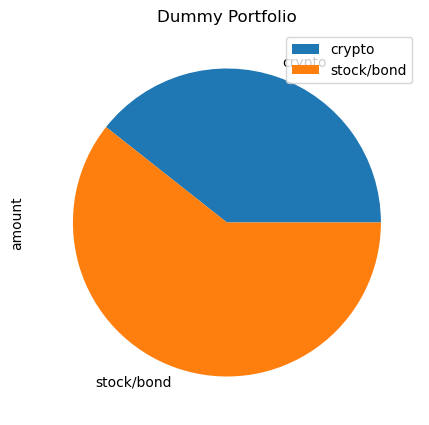

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(
    y='amount',
    figsize=(5,5),
    title='Dummy Portfolio'
)



#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    display('congrats on the emergency fund')
elif total_portfolio == emergency_fund_value:
    display('congrats on your goal')
elif total_portfolio < emergency_fund_value:
    display(f('estimated additional funds needed: ', {emergency_fund_value - total_portfolio}))



'congrats on the emergency fund'

## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-05-01", tz="America/New_York").isoformat()

In [29]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)

# # Concatenate the ticker DataFrames
closing_df = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# # Display both the first and last five rows of the DataFrame
closing_df.head()


AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099551   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97  3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88  4611519   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41  6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77  3786651   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-05-01 04:00:00+00:00       24394  116.846121  285.31  290.6572  281.5200   
2020-05-04 04:00:00+00:00       15545  116.960599  280.73  283.9000  279.1300   
2020-05-05 04:00:00+00:00       15146  116.879640  286.64  289.2500  283.7134   
2020-05-06 04:00:00+00:00       20233  116.426742  288.05  288.4600  283.7800   
2020-05-07 04:00:00+00:00       15963  116.641826  287.75  289.7800  287.1300   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00  282.83  125180028      639987  284.092832  
2020-05-04 04:00:00+00:00  283.59   80882213      460681  281.765334  
2020-05-05 04:00:00+00:00  286.15   79569939      459764  287.400201  
2020-05-06 04:00:00+00:00  284.34   73632628      436219  286.096273  
2020-05-07 04:00:00+00:00  287.70   75250412      422688  287.989956

In [30]:
closing_df.tail()

AGG                                     \
                             open    high      low   close    volume   
timestamp                                                              
2023-04-25 04:00:00+00:00   99.97  100.25  99.9636  100.18   5065416   
2023-04-26 04:00:00+00:00  100.16  100.22  99.7200   99.81   3723566   
2023-04-27 04:00:00+00:00   99.61   99.63  99.3900   99.45   4018321   
2023-04-28 04:00:00+00:00   99.91   99.99  99.7200   99.96   5314632   
2023-05-01 04:00:00+00:00   99.35   99.41  98.5950   98.69  10631667   

                                                      SPY                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2023-04-25 04:00:00+00:00       26744  100.112017  410.58  411.16  406.020   
2023-04-26 04:00:00+00:00       18350   99.907609  406.72  407.84  403.780   
2023-04-27 04:00:00+00:00       21343   99.478744  407.00  412.69  406.740   
2023-04-28 04:00:00+00:00       24244   99.898951  411.49  415.93  411.430   
2023-05-01 04:00:00+00:00       24231   99.028460  415.47  417.62  415.265   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2023-04-25 04:00:00+00:00  406.08  97784465      612111  408.273271  
2023-04-26 04:00:00+00:00  404.36  80954650      572128  405.591919  
2023-04-27 04:00:00+00:00  412.41  92968169      614868  410.101891  
2023-04-28 04:00:00+00:00  415.93  84857179      592226  414.377425  
2023-05-01 04:00:00+00:00  415.51  62135864      502911  416.206296

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [31]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC = MCSimulation(
    portfolio_data = closing_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30)

# Review the simulation input data
MC.portfolio_data.head()


AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099551   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97  3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88  4611519   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41  6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77  3786651   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-05-01 04:00:00+00:00       24394  116.846121          NaN  285.31   
2020-05-04 04:00:00+00:00       15545  116.960599     0.000856  280.73   
2020-05-05 04:00:00+00:00       15146  116.879640    -0.000769  286.64   
2020-05-06 04:00:00+00:00       20233  116.426742    -0.004021  288.05   
2020-05-07 04:00:00+00:00       15963  116.641826     0.003093  287.75   

                                                                              \
                               high       low   close     volume trade_count   
timestamp                                                                      
2020-05-01 04:00:00+00:00  290.6572  281.5200  282.83  125180028      639987   
2020-05-04 04:00:00+00:00  283.9000  279.1300  283.59   80882213      460681   
2020-05-05 04:00:00+00:00  289.2500  283.7134  286.15   79569939      459764   
2020-05-06 04:00:00+00:00  288.4600  283.7800  284.34   73632628      436219   
2020-05-07 04:00:00+00:00  289.7800  287.1300  287.70   75250412      422688   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-05-01 04:00:00+00:00  284.092832          NaN  
2020-05-04 04:00:00+00:00  281.765334     0.002687  
2020-05-05 04:00:00+00:00  287.400201     0.009027  
2020-05-06 04:00:00+00:00  286.096273    -0.006325  
2020-05-07 04:00:00+00:00  287.989956     0.011817

In [32]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/melissadiquisto/Bootcamp/FinTech_Workspace/Module_5/Starter_Code_4/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990202,1.011518,0.986554,0.994485,0.988090,0.991983,1.005884,0.991749,0.995404,0.983523,...,1.001984,0.987639,0.998822,1.002696,0.997395,0.994369,0.995553,0.990255,0.995905,0.996208
2,0.986379,1.015141,0.968104,0.992045,0.976935,0.991603,1.010539,0.999564,0.998288,0.974140,...,1.005688,0.986836,0.997116,0.997148,0.998726,0.979257,0.999359,0.994336,1.012797,0.995353
3,1.000590,1.002866,0.965084,1.007532,0.985752,0.999153,1.009162,1.003023,0.990699,0.965153,...,1.008030,0.993126,0.999534,0.993271,0.994873,0.965697,0.987077,0.994217,1.016018,0.987296
4,1.008295,0.996887,0.958353,1.000900,0.990083,1.009935,1.019434,0.984327,0.993939,0.954049,...,0.996571,0.997976,0.994614,1.002962,0.995852,0.967993,0.987135,0.997256,1.014332,0.997569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.231361,6.587616,4.669437,3.400376,4.702474,3.366676,3.602064,3.121539,3.519356,5.918025,...,1.233811,5.560033,4.066628,4.909607,10.473509,4.684937,4.171427,4.132120,4.391318,9.453898
7557,1.230327,6.653430,4.675940,3.371137,4.702157,3.419658,3.589619,3.117951,3.533060,5.988445,...,1.220093,5.512018,4.091485,4.916653,10.515198,4.674555,4.173577,4.180813,4.380576,9.557380
7558,1.244136,6.689150,4.659810,3.342613,4.722688,3.423959,3.622072,3.107877,3.486000,6.022929,...,1.224111,5.484469,4.099604,4.923503,10.595340,4.721734,4.174619,4.211114,4.371065,9.451242
7559,1.258097,6.721007,4.639414,3.354399,4.626459,3.424981,3.580284,3.141091,3.509204,6.013494,...,1.204557,5.440487,4.093072,4.882959,10.458043,4.681018,4.172200,4.183150,4.404205,9.342252


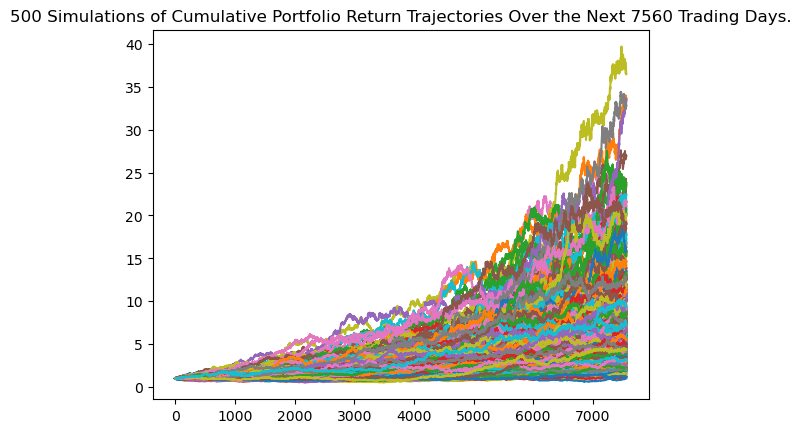

In [33]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
line_plot = MC.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

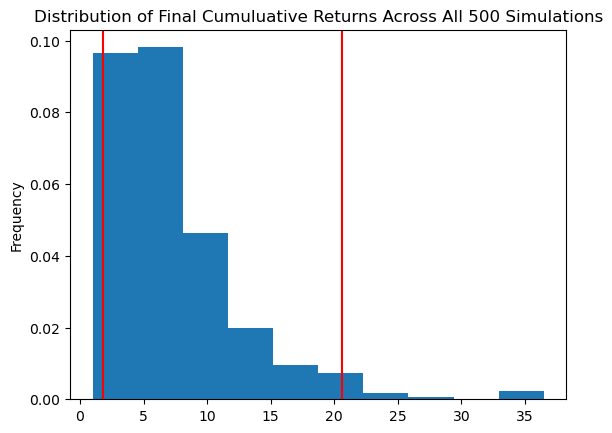

In [34]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
his_plot = MC.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [35]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
summary_stats = MC.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
summary_stats

count           500.000000
mean              7.253423
std               5.107911
min               1.011179
25%               3.851856
50%               5.858344
75%               9.220196
max              36.478556
95% CI Lower      1.824228
95% CI Upper     20.623958
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?
1.82 and 23.03

In [36]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds


65343.5

In [37]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = summary_stats[8] * 10000
ci_upper_thirty_cumulative_return = summary_stats[9] * 10000

# Print the result of your calculations
print(f"upper: ${ci_upper_thirty_cumulative_return} and lower: ${ci_lower_thirty_cumulative_return}")


upper: $206239.57962769395 and lower: $18242.27645156534


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [38]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC = MCSimulation(
    portfolio_data = closing_df,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10)

# Review the simulation input data
MC.portfolio_data.head()



AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099551   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97  3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88  4611519   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41  6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77  3786651   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-05-01 04:00:00+00:00       24394  116.846121          NaN  285.31   
2020-05-04 04:00:00+00:00       15545  116.960599     0.000856  280.73   
2020-05-05 04:00:00+00:00       15146  116.879640    -0.000769  286.64   
2020-05-06 04:00:00+00:00       20233  116.426742    -0.004021  288.05   
2020-05-07 04:00:00+00:00       15963  116.641826     0.003093  287.75   

                                                                              \
                               high       low   close     volume trade_count   
timestamp                                                                      
2020-05-01 04:00:00+00:00  290.6572  281.5200  282.83  125180028      639987   
2020-05-04 04:00:00+00:00  283.9000  279.1300  283.59   80882213      460681   
2020-05-05 04:00:00+00:00  289.2500  283.7134  286.15   79569939      459764   
2020-05-06 04:00:00+00:00  288.4600  283.7800  284.34   73632628      436219   
2020-05-07 04:00:00+00:00  289.7800  287.1300  287.70   75250412      422688   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-05-01 04:00:00+00:00  284.092832          NaN  
2020-05-04 04:00:00+00:00  281.765334     0.002687  
2020-05-05 04:00:00+00:00  287.400201     0.009027  
2020-05-06 04:00:00+00:00  286.096273    -0.006325  
2020-05-07 04:00:00+00:00  287.989956     0.011817

In [39]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/melissadiquisto/Bootcamp/FinTech_Workspace/Module_5/Starter_Code_4/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.022056,1.012947,1.018608,1.006277,0.999507,1.003013,0.997301,1.006181,1.005802,0.999861,...,0.997406,0.988063,1.002200,0.996442,0.996059,0.992798,0.992574,0.991256,0.999153,0.994208
2,1.019435,1.000340,1.024422,1.013292,1.007543,1.015409,1.016090,1.019432,1.014674,0.984818,...,0.982411,0.983934,1.005741,1.002774,0.995237,0.988153,0.992474,0.989447,1.002916,1.000939
3,1.038213,0.987017,1.018368,1.006726,1.006155,1.012738,1.012139,1.008259,1.025617,1.002469,...,0.994169,0.972256,1.003041,0.997753,1.000588,0.980377,0.999769,0.992087,1.009474,1.016025
4,1.054248,0.983474,1.033949,1.000251,1.018633,1.022873,1.005636,1.013341,1.014318,1.001450,...,0.995404,0.977847,1.002242,0.992761,0.986671,0.986791,1.007592,0.983302,1.005504,1.020378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.850666,1.922802,2.229159,2.756347,1.525976,1.289439,1.323576,4.287433,2.778013,3.665237,...,2.095303,4.402346,1.293522,2.623607,1.764329,2.848642,0.829214,2.535349,1.285834,2.062853
2517,1.840281,1.928032,2.234497,2.714208,1.506197,1.303570,1.317970,4.275202,2.767123,3.676205,...,2.103713,4.410957,1.301966,2.622813,1.767367,2.879750,0.824767,2.536408,1.302807,2.061887
2518,1.865625,1.912980,2.269428,2.690051,1.501464,1.324901,1.319707,4.338572,2.748091,3.684475,...,2.079948,4.356847,1.306462,2.624913,1.773691,2.862822,0.818171,2.555975,1.316367,2.074677
2519,1.887608,1.925907,2.261395,2.696015,1.510821,1.340240,1.298595,4.369773,2.772870,3.643548,...,2.067574,4.377912,1.320743,2.633828,1.742471,2.861875,0.822517,2.564273,1.302792,2.130219


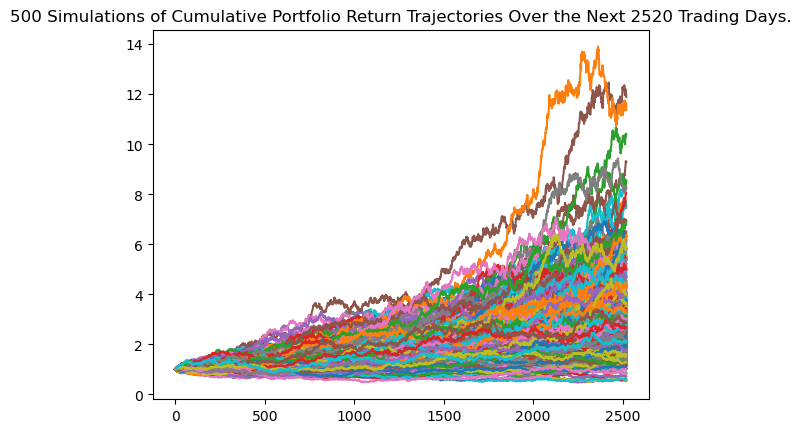

In [40]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
line_plot = MC.plot_simulation()


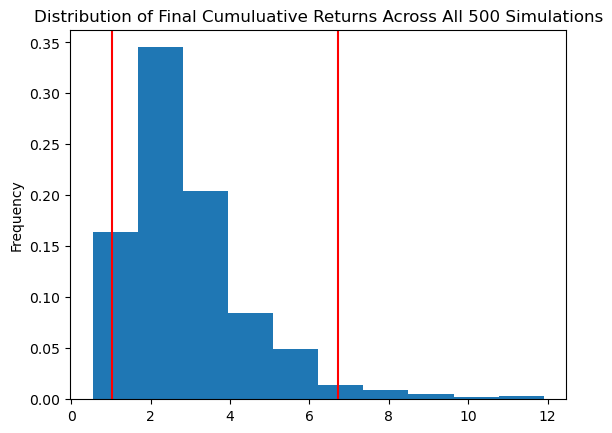

In [41]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
his_plot = MC.plot_distribution()


In [42]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
summary_stats = MC.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
summary_stats

count           500.000000
mean              2.929414
std               1.580704
min               0.543924
25%               1.879957
50%               2.582740
75%               3.533088
max              11.900575
95% CI Lower      1.031712
95% CI Upper      6.713135
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [43]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds


65343.5

In [44]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = summary_stats[8] * 10000
ci_upper_ten_cumulative_return = summary_stats[9] * 10000

# Print the result of your calculations
print(f"upper: ${ci_upper_thirty_cumulative_return} and lower: ${ci_lower_thirty_cumulative_return}")

upper: $206239.57962769395 and lower: $18242.27645156534


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?